# Transformacion de datos (puntos extras)

Ejercicio de practica

---

Created By: Dilan Gonzalez Castaneda A00831905

## Load dataframe

In [69]:
# Load the csv
import pandas as pd

df = pd.read_csv('merged_db00.csv')
df.head()

,region,division,sucursal,ubicacion,Country,State,City,si_m_12,si_m_11,si_m_10,...,qts_m_09,qts_m_08,qts_m_07,qts_m_06,qts_m_05,qts_m_04,qts_m_03,qts_m_02,qts_m_01,qts_act
0,Nucleo Dos,Division Distrito Central,Campo Zaragoza,"19.41, -99.175",Mexico,Ciudad de México,Ciudad de México,2.631211e+07,2.691944e+07,2.729243e+07,...,92767.31,34143.60,6568.35,93151.85,37364.73,4781.56,7592.88,74340.27,15520.21,93744.58
1,Nucleo Dos,Division Distrito Central,Colinas GAM,"19.51, -99.12",Mexico,Ciudad de México,Ciudad de México,0.000000e+00,0.000000e+00,0.000000e+00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Nucleo Dos,Division Distrito Central,Jardin Aragon A,"19.495, -99.11",Mexico,Ciudad de México,Ciudad de México,2.264078e+07,2.375393e+07,2.460094e+07,...,6221.11,4638.62,9644.74,9470.70,28591.26,33659.34,26106.43,13250.40,3128.71,32400.23
3,Nucleo Dos,Division Distrito Central,Lomas Zaragoza,"19.415, -99.18",Mexico,Ciudad de México,Ciudad de México,5.100963e+06,6.022058e+06,6.587654e+06,...,8943.56,-6805.17,1009.09,8973.87,297.31,0.00,3070.31,6603.06,877.14,1612.89
4,Nucleo Dos,Division Distrito Central,Los Arcos,"19.46, -99.145",Mexico,Ciudad de México,Ciudad de México,2.797123e+07,2.883083e+07,2.921744e+07,...,10072.58,24835.21,9880.33,40455.48,15677.27,1725.14,13966.61,-409.53,29611.76,11949.84


What I can use from here is region and division for some codification, mora_30_89 for normalization and [sucursal, cd_06] for one hot encoding so it can be filtered afterwards.

## Ejemplo de codificacion

Instead of having the whole name of each region, we could use codification so it gets a nomainal value assigned. This brings some adventage in memory and processing resources when comparing numbers to numbers instead of strings to strings. 

_Even though OrdinalEncoder is been used, in this case it does not refer to an importance accomadation but is the tool that we can use offered by scikit-learn. Another option is doing the mapping by hand._

In [70]:
from sklearn.preprocessing import OrdinalEncoder

# OPCION 1
# Step 1: Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Step 2: Fit the encoder to the 'region' column and transform it
df['region_code'] = encoder.fit_transform(df[['region']])
df.insert(1, 'region_code', df.pop('region_code'))

# Display the mapping and the updated DataFrame
print("Region Mapping:", dict(zip(encoder.categories_[0], range(len(encoder.categories_[0])))))
df.sample(7)

# OPCION 2
# # Sample DataFrame
# # Step 1: Get unique region values
# region_cod = df['region'].unique().tolist()

# # Step 2: Create a mapping from region to code
# region_mapping = {region: code for code, region in enumerate(region_cod)}

# # Step 3: Apply the mapping to the DataFrame
# df['region_code'] = df['region'].map(region_mapping)
# df.insert(1, 'region_code', df.pop('region_code'))

# # Display the mapping and the updated DataFrame
# print("Region Mapping:", region_mapping)
# df.sample(7)

Region Mapping: {'Nucleo Dos': 0, 'Nucleo Uno': 1, 'Occidente Conexion': 2, 'Red Noroeste': 3, 'Red Nortena': 4, 'Red Sureste': 5}


,region,region_code,division,sucursal,ubicacion,Country,State,City,si_m_12,si_m_11,...,qts_m_09,qts_m_08,qts_m_07,qts_m_06,qts_m_05,qts_m_04,qts_m_03,qts_m_02,qts_m_01,qts_act
109,Occidente Conexion,2.0,Zona Valles del Pacifico,Zapopan Plaza,"20.72, -103.4",Mexico,Jalisco,Zapopan,1.359305e+07,1.410783e+07,...,1494.66,24832.09,70191.15,7974.80,34120.10,30692.50,9769.96,36913.22,41782.49,3728.50
49,Nucleo Uno,1.0,Division Red Mexiquense,Valle Verde,"19.52, -99.27",Mexico,Estado de México,Naucalpan de Juárez,1.427773e+07,1.475228e+07,...,1360.88,7682.34,720.22,-570.84,7774.52,7225.61,18382.39,9666.74,2686.42,1782.76
89,Occidente Conexion,2.0,Zona Cumbres del Pacifico,Riviera Vallarta,"20.62, -105.23",Mexico,Jalisco,Puerto Vallarta,1.753377e+07,1.831663e+07,...,29946.60,30161.93,23777.04,73487.36,26345.41,72772.78,657.58,40026.19,28197.85,3705.02
126,Red Noroeste,3.0,Zona Costa del Pacifico,Valle Mexicali,"32.65, -115.48",Mexico,Baja California,Mexicali,2.452576e+07,2.542557e+07,...,4425.43,6847.96,4464.15,31661.07,98507.18,43895.05,29534.48,27941.57,29701.21,42448.89
108,Occidente Conexion,2.0,Zona Valles del Pacifico,Oblatos Plaza,"20.68, -103.3",Mexico,Jalisco,Guadalajara,8.419614e+06,8.906569e+06,...,945.99,14692.65,729.33,12699.91,102784.71,52745.49,2352.98,32580.81,-2470.33,4225.62
177,Red Sureste,5.0,Zona Riviera del Caribe,Isla del Carmen,"18.64, -91.82",Mexico,Campeche,Ciudad del Carmen,1.374822e+07,1.422482e+07,...,5382.44,7108.07,871.18,5804.86,16238.07,4085.54,4661.35,29660.52,1428.84,10998.74
87,Occidente Conexion,2.0,Zona Cumbres del Pacifico,Norte GDL,"20.72, -103.38",Mexico,Jalisco,Zapopan,2.252635e+07,2.378221e+07,...,44280.43,17141.64,2937.23,58879.11,231866.35,12191.66,41031.56,14254.42,22144.71,192561.59


## Ejemplo de Normalizacion

We can compute the mora_30_80 and change all values to (0,1) so it is easy to compare.

In [71]:
from sklearn.preprocessing import MinMaxScaler

mora_30_89_act = df['si_30_89_act'] / df['si_act'] * 100

scaler = MinMaxScaler()
df['mora_30_89_act'] = scaler.fit_transform(mora_30_89_act.values.reshape(-1, 1))

df.sample(7)


,region,region_code,division,sucursal,ubicacion,Country,State,City,si_m_12,si_m_11,...,qts_m_08,qts_m_07,qts_m_06,qts_m_05,qts_m_04,qts_m_03,qts_m_02,qts_m_01,qts_act,mora_30_89_act
117,Red Noroeste,3.0,Division Sierra del Desierto,Plaza Cuauhtemoc,"28.4, -106.87",Mexico,Chihuahua,Cuauhtémoc,1.099251e+07,1.152567e+07,...,10317.23,11186.63,27141.19,1465.05,2403.69,23246.16,28787.87,8707.62,9453.30,0.393518
110,Red Noroeste,3.0,Division Sierra del Desierto,Americas Plaza,"28.67, -106.12",Mexico,Chihuahua,Chihuahua,2.057750e+07,2.194078e+07,...,1189.85,4221.96,5306.89,20217.06,19345.77,3698.64,20823.85,9715.19,13865.96,0.179906
91,Occidente Conexion,2.0,Zona Tierra de lagos,Bahia Lazaro,"18.02, -102.22",Mexico,Michoacán,Las Guacamayas,1.977693e+07,2.058874e+07,...,4261.31,7134.24,5900.29,24831.73,2723.96,186924.47,55838.84,90718.26,32178.45,0.193602
69,Nucleo Uno,1.0,Zona Sur Central,Cuautla Vista,"18.8128, -98.95",Mexico,Morelos,Cuautla,2.444371e+07,2.525921e+07,...,16481.86,6896.90,3387.99,28490.35,6271.45,3516.11,27675.25,8468.10,26695.32,0.122591
107,Occidente Conexion,2.0,Zona Valles del Pacifico,Las Aguilas,"20.67, -103.41",Mexico,Jalisco,Zapopan,2.303601e+07,2.466463e+07,...,59447.94,24205.78,73340.31,121469.33,29608.77,21710.60,9717.46,52612.71,38531.86,0.246703
95,Occidente Conexion,2.0,Zona Tierra de lagos,Montes Zitacuaro,"19.43, -100.36",Mexico,Michoacán,Zitácuaro,1.098136e+07,1.138660e+07,...,3594.88,2599.17,1429.61,541.59,990.69,3091.81,1210.40,2144.25,6880.90,0.064098
88,Occidente Conexion,2.0,Zona Cumbres del Pacifico,Norte Tepic,"21.53, -104.88",Mexico,Nayarit,Tepic,2.296946e+07,2.324947e+07,...,4150.73,27681.82,23477.67,17221.61,42613.18,30719.64,71103.76,4875.85,49132.82,0.134198


## Ejemplo de Discretizacion


Another option to use the mora_30_80 is by discretize it so we can create bins and group the sucursals by them.

In [72]:
df['mora_30_89_act'] = df['si_30_89_act'] / df['si_act'] * 100

In [73]:
df['mora_30_89_act'].isnull().sum()

np.int64(0)

In [74]:
import numpy as np


df['mora_30_89_act'] = np.where(df['mora_30_89_act'].isnull(),df['mora_30_89_act'].mean(),df['mora_30_89_act'])
df['mora_30_89_act'].isnull().sum()

np.int64(0)

<Axes: ylabel='Frequency'>

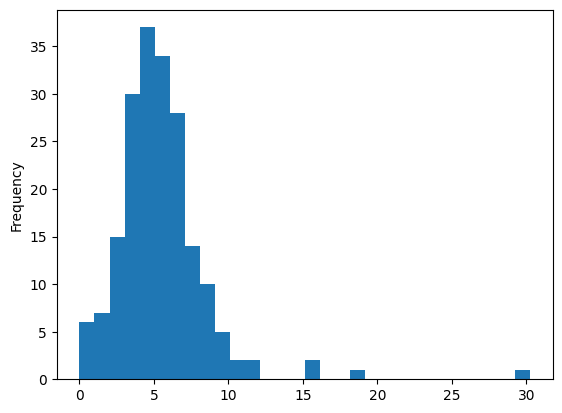

In [75]:
df['mora_30_89_act'].plot.hist(bins=30)

In [76]:
maxrange = int(np.ceil(max(df['mora_30_89_act'])))
minrange = int(np.floor(min(df['mora_30_89_act'])))
moraRange = int(maxrange - minrange)
bins = 4
binwidth = int(round(moraRange/bins))

print("Rango max:",maxrange)
print("Rango min:",minrange)
print("Rango:",moraRange)
print("Ancho de los grupos:",binwidth)

Rango max: 31
Rango min: 0
Rango: 31
Ancho de los grupos: 8


In [77]:
intervalos = [pct for pct in range(minrange, maxrange+binwidth, binwidth)]
intervalos

[0, 8, 16, 24, 32]

In [78]:
binlabels = ["p0",'p3','p6','p9'] # p: penalizacion #: cant. ptos
binlabels

['p0', 'p3', 'p6', 'p9']

In [79]:
df["mora_30_89_categ"]=pd.cut(df['mora_30_89_act'],bins = 
                         intervalos, labels = binlabels, include_lowest=True)

df.sample(7)

,region,region_code,division,sucursal,ubicacion,Country,State,City,si_m_12,si_m_11,...,qts_m_07,qts_m_06,qts_m_05,qts_m_04,qts_m_03,qts_m_02,qts_m_01,qts_act,mora_30_89_act,mora_30_89_categ
150,Red Nortena,4.0,Division Red Nortena,Sabinas Sierra,"27.85, -101.15",Mexico,Coahuila,Sabinas,1.649715e+07,1.752697e+07,...,209.39,32494.26,1076.13,18012.38,3602.58,8984.02,45826.51,5239.28,1.771087,p0
131,Red Noroeste,3.0,Zona Desierto del Sol,Sierra Hermosillo,"29.07, -110.95",Mexico,Sonora,Hermosillo,3.616354e+07,3.752716e+07,...,32345.14,128668.23,26068.96,50714.13,13655.93,29676.07,37813.18,49532.66,6.115356,p0
192,Red Sureste,5.0,Zona Sierra Escondida,Riviera Escondida,"15.86, -97.07",Mexico,Oaxaca,Puerto Escondido,1.601025e+07,1.678887e+07,...,28975.99,4584.29,12771.35,19621.01,3105.45,2103.85,16642.83,2732.63,4.333767,p0
188,Red Sureste,5.0,Zona Selva Alta,Villa Central,"17.74, -91.77",Mexico,Tabasco,Emiliano Zapata,3.046310e+07,3.041690e+07,...,39425.70,15070.53,4401.68,39805.12,4951.37,47144.83,4611.52,25507.99,8.168190,p3
37,Nucleo Dos,0.0,Zona Oriente Conexion,Robledal A,"19.4, -99.05",Mexico,Estado de México,Ciudad Nezahualcóyotl,3.326626e+07,3.412570e+07,...,7948.28,25688.63,6946.69,-918.16,23986.98,65801.40,45063.00,3139.41,7.599404,p0
69,Nucleo Uno,1.0,Zona Sur Central,Cuautla Vista,"18.8128, -98.95",Mexico,Morelos,Cuautla,2.444371e+07,2.525921e+07,...,6896.90,3387.99,28490.35,6271.45,3516.11,27675.25,8468.10,26695.32,3.711723,p0
175,Red Sureste,5.0,Zona Riviera del Caribe,Bahia Campeche,"19.85, -90.53",Mexico,Campeche,San Francisco de Campeche,3.359694e+07,3.520069e+07,...,33988.87,45109.14,37863.37,38124.95,5275.55,37771.33,17969.05,8279.82,3.845166,p0


C:\Users\dilan\AppData\Local\Temp\ipykernel_29164\1166054827.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("mora_30_89_categ")['mora_30_89_act'].count().plot.bar()


Text(0, 0.5, 'conteo de observaciones')

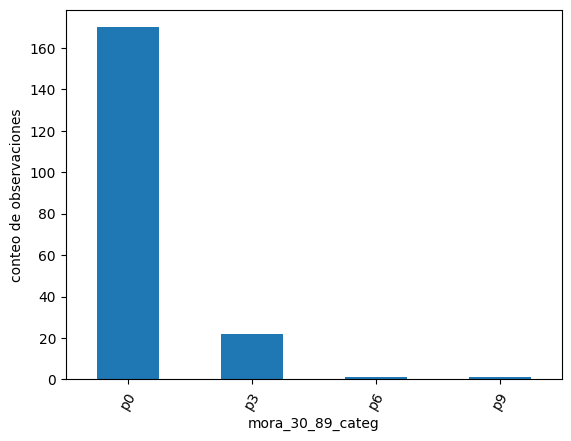

In [80]:
import matplotlib.pyplot as plt

df.groupby("mora_30_89_categ")['mora_30_89_act'].count().plot.bar()
plt.xticks(rotation=60)
plt.ylabel('conteo de observaciones')